# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [50]:
## Importing Important Libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/Users/ASUS/Downloads/IBM_HR_Attrition_Rate_Analytics-master/IBM_HR_Attrition_Rate_Analytics-master/ibm-hr-analytics-employee-attrition-performance/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# EDA analysis

In [3]:
data.shape

(1470, 35)

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


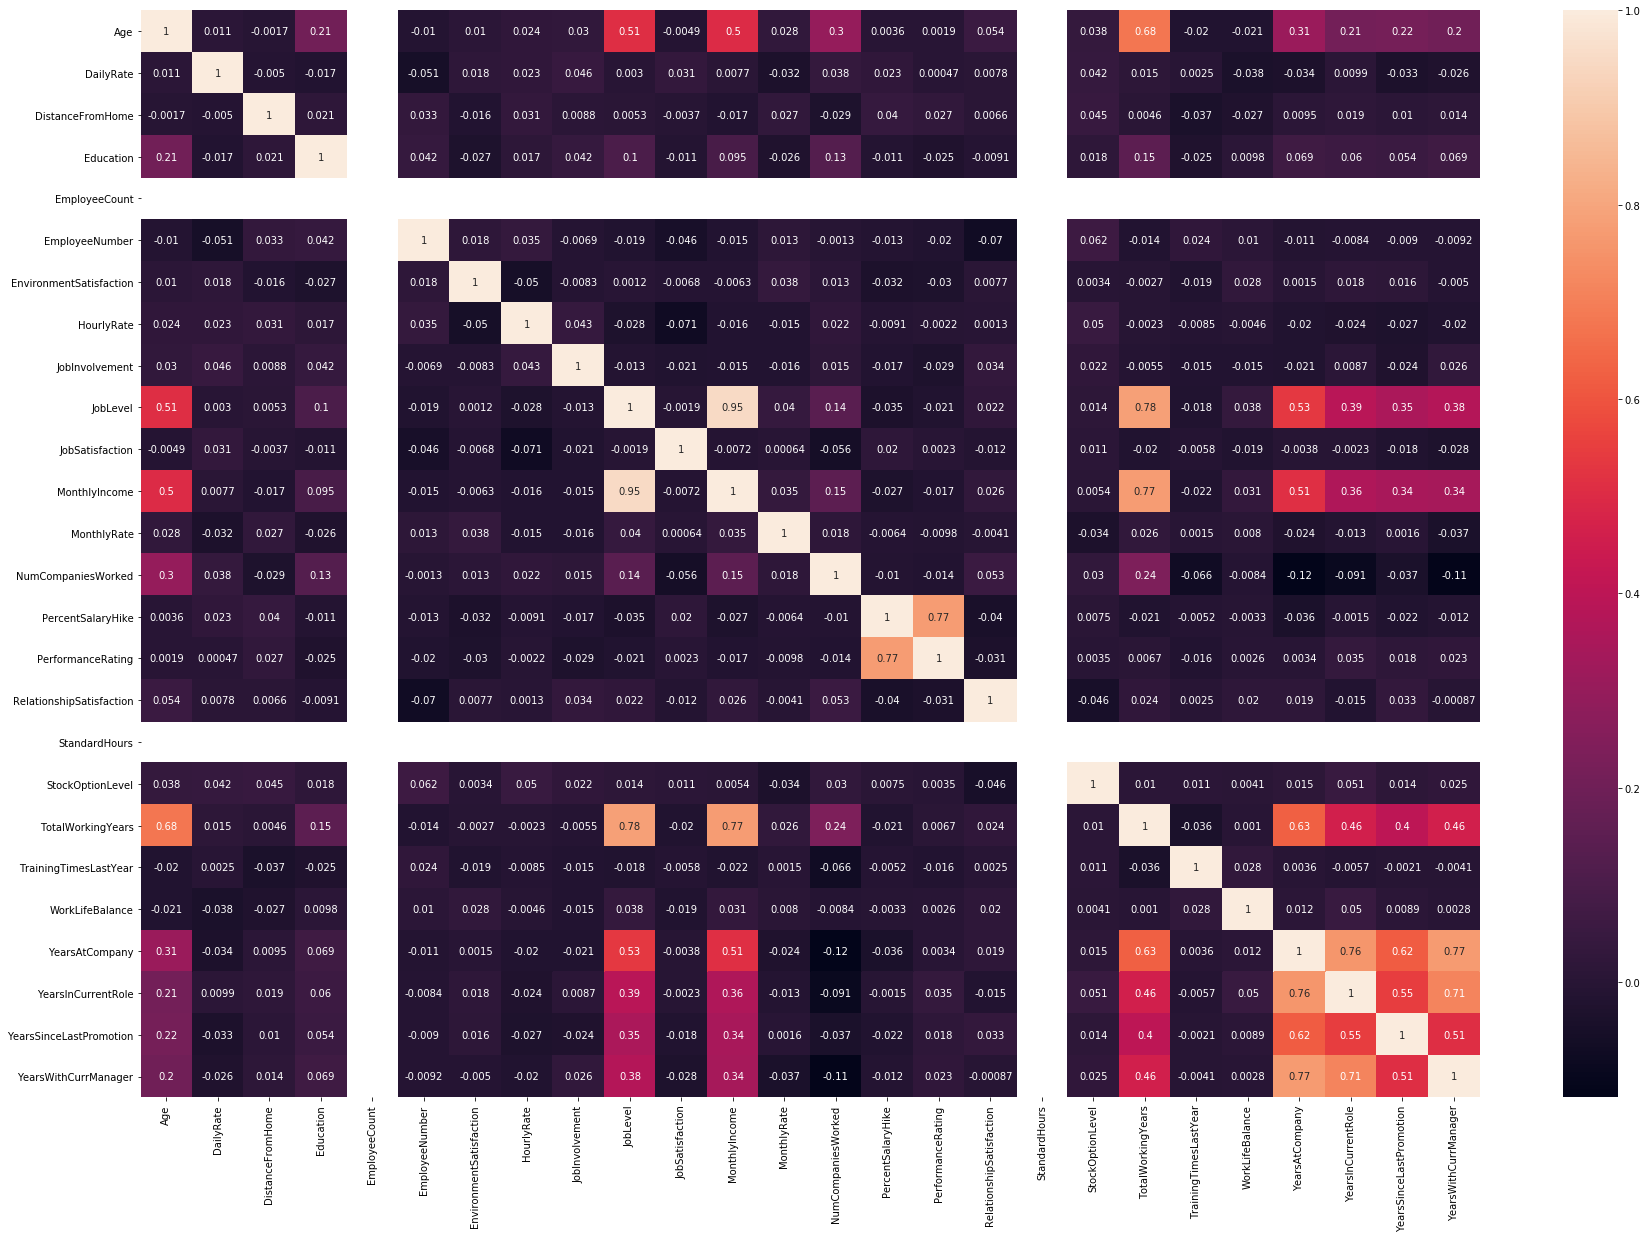

In [7]:
plt.figure(figsize= (30,20))
sns.heatmap(data.corr(),annot=True)

In [8]:
attrition_count = pd.DataFrame(data['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


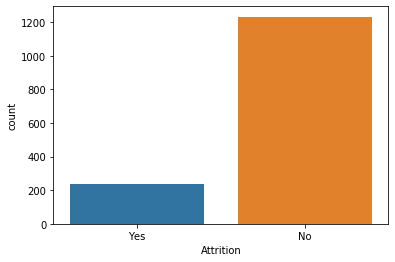

In [9]:
sns.countplot(data['Attrition'])

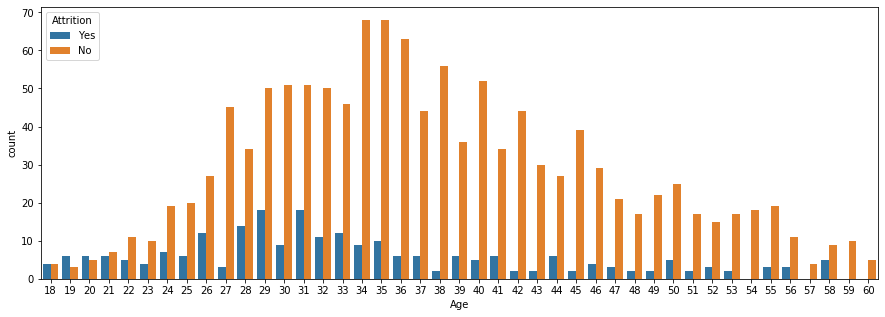

In [10]:
plt.figure(figsize= (15,5))
sns.countplot(x='Age', hue='Attrition', data=data)

In [11]:
#all the data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ': ' +str(data[column].unique()))
        print(data[column].value_counts())
        print('\n')

Attrition: ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Hu

In [12]:
#Removing useless columns or single value columns

data = data.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [13]:
# lets see correlation
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


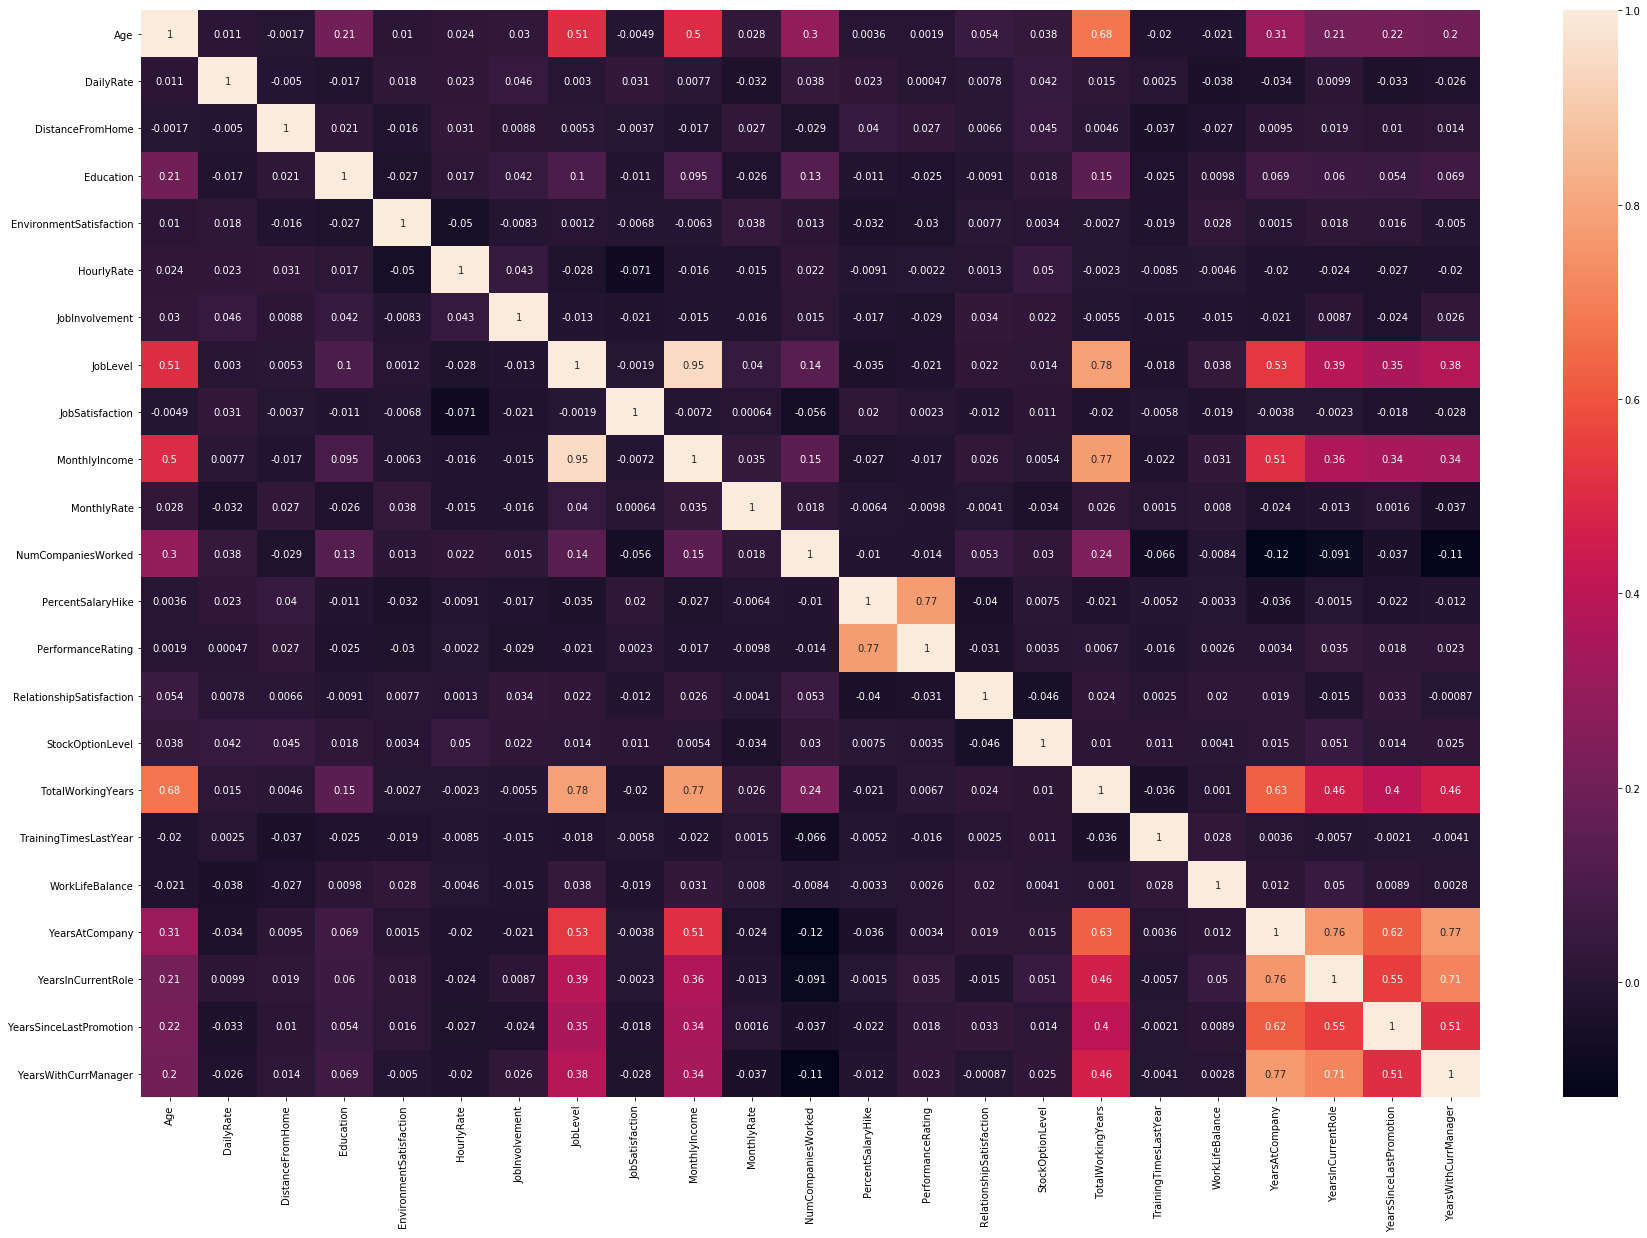

In [14]:
plt.figure(figsize= (30,20))
sns.heatmap(data.corr(),annot=True)

# Preprocessing

In [15]:
#transforming catagorical data to numerical data
le=LabelEncoder()
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column] = le.fit_transform(data[column])

In [16]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


In [17]:
data.select_dtypes('object')

""
0
1
2
3
4
5
6
7
8
9


In [18]:
#spliting data X and y
X = data.drop('Attrition',axis=1)
y = data.Attrition

In [19]:
#spliting data training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

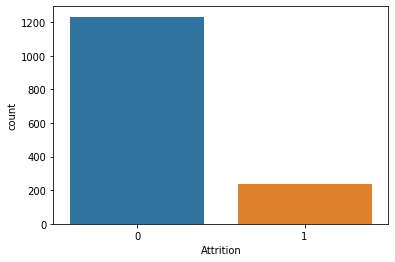

In [20]:
sns.countplot(data['Attrition'])

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [22]:
X_train

array([[ 1.21368984,  0.59287923, -0.68568713, ..., -1.18534384,
        -0.6731433 , -1.15307909],
       [-0.32191668, -2.39767336,  1.46626729, ..., -0.62928329,
        -0.3666546 , -0.59615894],
       [-0.32191668,  0.59287923,  1.30803535, ...,  1.31692863,
         0.24632279,  2.18844183],
       ...,
       [ 0.11682804,  0.59287923, -1.18411775, ..., -1.18534384,
         1.47227757,  0.79614144],
       [-1.3090923 ,  0.59287923, -0.24659349, ..., -0.62928329,
        -0.3666546 , -0.59615894],
       [ 0.00714186,  0.59287923, -0.02506877, ..., -0.35125302,
        -0.6731433 , -0.03923879]])

In [23]:
X_test

array([[-1.18870536, -0.93908186, -0.97754127, ...,  0.7748134 ,
        -0.37400273, -1.16308341],
       [ 2.08357343,  0.58347366, -0.92653146, ..., -0.04068233,
         0.58678487, -0.3082171 ],
       [-0.5342496 , -0.93908186,  0.38402835, ...,  1.0466453 ,
         0.26652234,  0.83160464],
       ...,
       [-0.20702172,  0.58347366, -0.27909922, ..., -0.31251423,
        -0.69426527, -0.02326167],
       [-0.42517364, -2.46163739, -0.06328847, ...,  1.0466453 ,
        -0.37400273,  0.83160464],
       [-0.20702172,  0.58347366,  1.47092975, ...,  0.7748134 ,
        -0.69426527,  1.11656007]])

# Data Modelling

In [24]:
#Using Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
#Using Support Vector Machine(SVM)
svc1 = SVC(kernel='linear',random_state=43) 
svc1.fit(X_train,y_train)

svc2 = SVC(kernel='rbf',random_state=43) #kernel SVM Algorithm
svc2.fit(X_train,y_train)

SVC(random_state=43)

In [27]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(X_train,y_train)

GaussianNB()

In [28]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=43)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=43)

In [29]:
#Printing Each model Accuracy of Traing Data
print('1. Logistic Regression Traing Accuracy : ',lr.score(X_train,y_train))

print('2. K Nearest neighbors(KNN) Traing Accuracy : ',knn.score(X_train,y_train))

print('3. Support Vector machine(Linear) Traing Accuracy : ',svc1.score(X_train,y_train))

print('4. Support Vector machine(RBF)  Traing Accuracy : ',svc2.score(X_train,y_train))

print('5. GaussianNB Traing Accuracy : ',gauss.score(X_train,y_train))

print('6. Random Forest Classifie Traing Accuracy : ',forest.score(X_train,y_train))

1. Logistic Regression Traing Accuracy :  0.892128279883382
2. K Nearest neighbors(KNN) Traing Accuracy :  0.8794946550048591
3. Support Vector machine(Linear) Traing Accuracy :  0.8775510204081632
4. Support Vector machine(RBF)  Traing Accuracy :  0.9086491739552964
5. GaussianNB Traing Accuracy :  0.8066083576287658
6. Random Forest Classifie Traing Accuracy :  0.9766763848396501


In [30]:
#Printing Each model Accuracy of Test Data
print('1. Logistic Regression Traing Accuracy : ',lr.score(X_test,y_test))

print('2. K Nearest neighbors(KNN) test Accuracy : ',knn.score(X_test,y_test))

print('3. Support Vector machine(Linear) test Accuracy : ',svc1.score(X_test,y_test))

print('4. Support Vector machine(RBF) test Accuracy : ',svc2.score(X_test,y_test))

print('5. GaussianNB test Accuracy : ',gauss.score(X_test,y_test))

print('6 Random Forest Classifier Test Accuracy : ',forest.score(X_test,y_test))

1. Logistic Regression Traing Accuracy :  0.8571428571428571
2. K Nearest neighbors(KNN) test Accuracy :  0.8344671201814059
3. Support Vector machine(Linear) test Accuracy :  0.8458049886621315
4. Support Vector machine(RBF) test Accuracy :  0.8390022675736961
5. GaussianNB test Accuracy :  0.7891156462585034
6 Random Forest Classifier Test Accuracy :  0.8412698412698413


In [54]:
print('1. Cross Validation of Logistic Regression : ',cross_val_score(lr,X,y,cv=5).mean())

1. Cross Validation of Logistic Regression :  0.8435374149659864


In [58]:
print('2. Cross Validation of K Nearest neighbors(KNN) : ',cross_val_score(knn,X,y,cv=5).mean())

2. Cross Validation of K Nearest neighbors(KNN) :  0.8244897959183672


In [64]:
print('3. Cross Validation of Support Vector machine(Linear) : ',cross_val_score(svc1,X,y,cv=5).mean())


3. Cross Validation of Support Vector machine(Linear) :  0.8734693877551021


In [63]:
print('4. Cross Validation of Support Vector machine(RBF) : ',cross_val_score(svc2,X,y,cv=5).mean())


4. Cross Validation of Support Vector machine(RBF) :  0.8387755102040817


In [61]:
print('5. Cross Validation of GaussianNB : ',cross_val_score(gauss,X,y,cv=5).mean())


4. Cross Validation of GaussianNB :  0.7972789115646258


In [62]:
print('6. Cross Validation of Random Forest Classifier Test Accuracy : ',cross_val_score(forest,X,y,cv=5).mean())

6. Cross Validation of Random Forest Classifier Test Accuracy :  0.8591836734693878


Here, Since Difference of Cross-Validation and accuracy is less in every model, we can select any model.

# Hyperparameters Tuning

In [72]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,2),
    'max_features' : ['auto','random']
}

In [75]:
#selecting Random Forest Classifier for hyperparameter tuning
grid_search = GridSearchCV(estimator=forest,param_grid=grid_param,cv=5,n_jobs=-1)

In [76]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=12,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'random'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10, 2)})

In [77]:
#Lets see the best parameter as per theour grid search
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [78]:
forest = RandomForestClassifier(criterion = 'entropy',
 max_depth= 17,
 max_features= 'auto',
 min_samples_leaf= 5,
 min_samples_split= 4)

In [79]:
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=5,
                       min_samples_split=4)

In [80]:
forest.score(X_test,y_test)

0.8321995464852607

# Model Saving

In [82]:
import joblib
joblib.dump(forest,"FinalModel.pkl")

['FinalModel.pkl']